<a href="https://colab.research.google.com/github/VaishnaviMoorthy-SRM/Diabetes_prediction_using_RF/blob/main/Diabetes_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
df = pd.read_csv('mhc_cleaned.csv')
df.shape
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
a = df.isnull().sum()
# delete 25 data points only have values for 7 features
df = df.loc[~df['Smoking'].isnull()]
# delete 35 data points only have values for 7 features
df = df.loc[~df['Smoking'].str.contains("-", case = False, na = False)]
df.columns
# remove data points that have no height value
df = df[df['Height'] != '-']
col = ['Height', 'Weight', 'BMI', 'Pulse_Per_Min','Glucose', 'Cholesterol', 'SGPT(ALT)', 'Creatinine', 'Triglycerides']
# data type to float
for i in col:
 df[i] = df[i].astype('float')
df.describe()
## take the left two sub string from 'Age' column, extracting numeric age
df['Age'] = df['Age'].str[:2]
# convert data type from string to float
num_col = ['Age', 'Male_Child','Female_Child','Lastchild_Age']
df[num_col] = df[num_col].astype('float')
df.describe()
# Family_Planning column data cleansing
# permanent contracept = 'Permanent'
df.loc[df['Family_Planning'].str.contains("Permanent|permanent|tubectomy|Tubectomy|Vasectomy|vasectomy", case = False,na = False), 'Family_Planning'] = 'Permanent'
# temporary contracept = 'Temporary'
df.loc[df['Family_Planning'].str.contains("Temporary|temporary", case = False, na = False), 'Family_Planning'] = 'Temporary'
# others = 'No contracept'
df.loc[~df['Family_Planning'].str.contains("Temporary|Permanent", case = False, na = False), 'Family_Planning'] = 'No Contracept'
# replace na values in Smoking Status to 'non-smoker'
df.loc[df['Smoking_Status'].isnull(), 'Smoking_Status'] = 'Non-smoker'
# replace na values in Alcohol Status to 'non-drinker'
df.loc[df['Alcohol_Status'].isnull(), 'Alcohol_Status'] = 'Non-drinker'
df.isnull().sum()
# column value only has "." or "," or "Normal", convert to "No", other values convert to "Yes"
text_col = ['Past_Diabetes', 'Past_Hypertension','Past_Epilepsy', 'Past_Asthma', 'Past_TB', 'Past_Psychiatry', 'APD','Past_Jaundice', 'Past_Heart_Attack', 'Past_Stroke', 'Past_Skin_Prob','Past_Resp_Manifest', 'Past_Eye_Prob', 'Past_Hear_Prob','Past_Accident', 'Past_Surgery', 'Family_Diabetes','Family_Hypertension', 'Family_Heart_Disease', 'Family_Stroke','Family_Obesity', 'Family_Epilepsy', 'Family_Asthma','Family_Premature_Death']
for col in text_col:
 df.loc[df[col] == '.', col] = 'Negative'
 df.loc[df[col] == ',', col] = 'Negative'
 df.loc[df[col].str.contains("No|no|Normal|normal", case = False, na = False), col] = 'Negative'
 df.loc[~df[col].str.contains("Negative", case = False, na = False), col] = 'Yes'
len(df[df['Past_Diabetes'] == 'Negative'])
for col in text_col:
 print(df[col].unique())
 for col in text_col:
  df.loc[df[col]=='Negative', col] = 'No'
len(df[df['Past_Diabetes'] == 'No'])
check_col = ['Giddiness', 'Headache', 'Breathlessness','Weakness', 'Tiredness', 'Itching', 'Weight_Loss', 'Excess_Appetite','Excess_Thirst', 'Excess_Urination', 'Sensation_Loss', 'Clubbing', 'Peripheral_Pulse']
for col in check_col:
 print(df[col].unique())
# get rid of check_col, only "No" and null values in there
df = df.drop(check_col, axis=1)
df.shape
model_col = []
# remove rows with height, weight, bmi, pulse_per_minute <=0
df = df.loc[(df['Height']>0)&(df['Weight']>0)&(df['BMI']>0)&(df['Pulse_Per_Min']>0)]
df.shape
# remove rows with no BP value
df = df.loc[(~df['BP'].isna())&(df['BP'] != '/'),]
df.shape
(7998, 62)
# split BP column into two columns by '/'
bp = df['BP'].str.split('/', expand=True)
# rename the split columns
bp.columns = ['BP_high', 'BP_low']
# merge the split BP columns to df
df = pd.concat([df.loc[:, df.columns != 'BP'], bp], axis=1)
df.shape
df['BP_low'].unique()
# add a '.' for BP_low to convert string to float
df['BP_low'] = df['BP_low']+'.'
# remove the row with missing BP low value
df = df.loc[df['BP_low'] != '.',]
# data type to float
for col in ['BP_high', 'BP_low']:
 df[col] = df[col].astype('float')
df.shape
col = ['Glucose', 'Cholesterol', 'SGPT(ALT)', 'Creatinine', 'Triglycerides', 'Diagnosis']
# remove na rows
for i in col:
 df = df.loc[df[i].notnull()]
df.shape
col = ['Abnormal_Vision_Eyes', 'Vision_Corrected', 'Abnormal_Hearing_Ears']
for i in col:
 print(df[i].describe())
 print(df[i].unique())
 # replace na values with 'Normal'
for i in col:
 df.loc[df[i].isnull(), i] = 'Normal'
df.shape
#exclude Summary_of_findings and Advice columns
df = df.drop(['Summary_Of_Findings', 'Advice'], axis = 1)
df.shape
#attribute removal
df = df.drop(['Male_Child','Family_Epilepsy', 'Past_Epilepsy', 'Female_Child', 'Lastchild_Age', 'Height', 'Weight', 'Past_Hear_Prob', 'Abnormal_Hearing_Ears','Sex','Marital_Status','Family_Planning','Past_Asthma','Past_Psychiatry','Past_Resp_Manifest','Past_Accident','Past_Surgery','Family_Asthma','Family_Premature_Death'], axis=1)
df.shape
# create a label column
df['label'] = 0
# if string contains 'diabete' or 'Diabete', label value = 1
df.loc[df['Diagnosis'].str.contains('Diabete'),'label'] = 1
df.loc[df['Diagnosis'].str.contains('diabete'),'label'] = 1
df[df['label'] == 1].shape
df[df['label'] == 0].shape
# remove Diagnosis column
# df = df.drop('Diagnosis', axis = 1)
# remove Patient number column
df = df.drop('PF_NO', axis = 1)
df.shape
df.columns
df.dtypes
# get the list of object columns
obj_col = list(df.select_dtypes(include=['object']).columns)
obj_col.remove('Diagnosis')
len(obj_col)



['Yes' 'Negative']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No']
['No']
['No']
['No']
['No']
['No']
['No']
['No']
['No']
['No']
['No']
['No' nan]
['No' nan]
count     3411
unique       2
top       Both
freq      3267
Name: Abnormal_Vision_Eyes, dtype: object
['Both' nan 'Single']
count          3411
unique            2
top       Corrected
freq           3300
Name: Vision_Corrected, dtype: object
['Corrected' nan 'Not Corrected']
count      451
unique       2
top       Both
freq       235
Name: Abnormal_Hearing_Ears, dtype: object
[nan 'Single' 'Both']


30

In [53]:
from sklearn.preprocessing import LabelEncoder
labelEncode = LabelEncoder()
for i in obj_col:
 df[i+'_encode']=labelEncode.fit_transform(df[i])
df.head()
encode_col = df.filter(like='_encode').columns
len(encode_col)

30

Alcohol_encode               Alcohol_Status_encode         -0.693507
Alcohol_Status_encode        Alcohol_encode                -0.693507
Smoking_encode               Smoking_Status_encode         -0.531919
Smoking_Status_encode        Smoking_encode                -0.531919
Cholesterol                  Investigation_Normal_encode   -0.509582
Investigation_Normal_encode  Cholesterol                   -0.509582
Abnormal_Vision_Eyes_encode  Vision_Corrected_encode        0.810621
Vision_Corrected_encode      Abnormal_Vision_Eyes_encode    0.810621
Abnormal_Vision_Eyes_encode  Vision_encode                  0.864852
Vision_encode                Abnormal_Vision_Eyes_encode    0.864852
                             Vision_Corrected_encode        0.893852
Vision_Corrected_encode      Vision_encode                  0.893852
dtype: float64

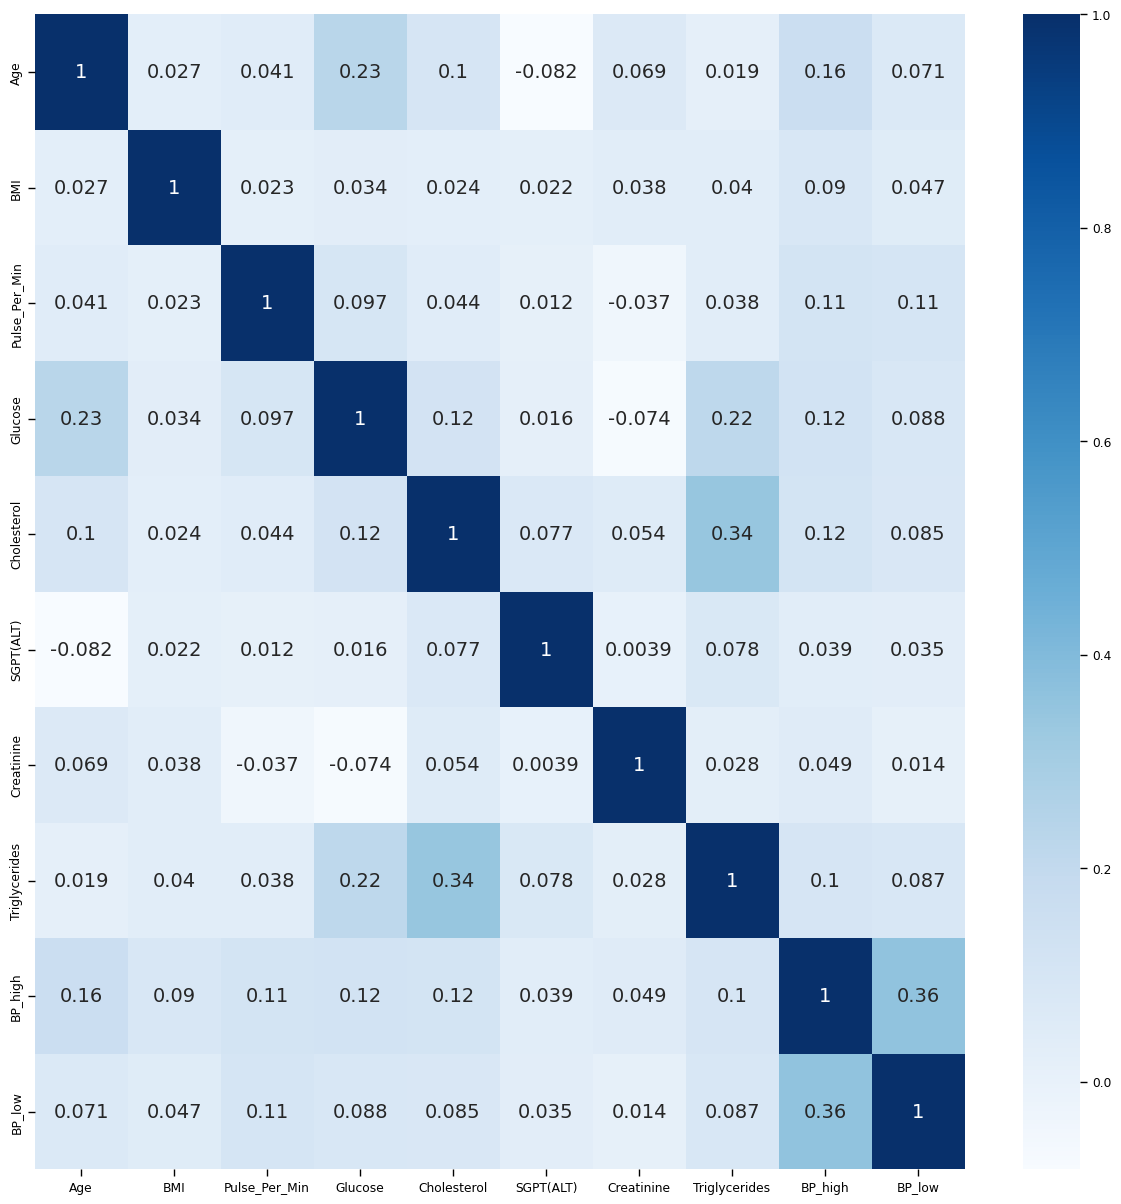

In [54]:
# get correlation for encoded object columns and label
encode_corr_col = encode_col.insert(0,'label')
corr = df[encode_corr_col].corr()
# heatmap of correlation of encoded object columns and label
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(40,40))
# sb.heatmap(corr, cmap="Blues", annot=True)
# get the list of object columns
float_col = list(df.select_dtypes(include=['float64']).columns)
corr = df[float_col].corr()
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(corr, cmap="Blues", annot=True)
encode_col = list(df.filter(like='_encode').columns)
corr_col = encode_col + float_col
# remove label column
# corr_col.remove('label')
corr = df[corr_col].corr()
# fig, ax = plt.subplots(figsize=(80,80))
# sb.set_context("paper", rc={"font.size":18,"axes.titlesize":18,"axes.labelsize":10})
# sb.heatmap(corr, cmap="Blues", annot=True)
sorted_mat = corr.unstack().sort_values()
# extract high correlation pairs
sort_corr = sorted_mat[((sorted_mat>0.5) & (sorted_mat<1))|((sorted_mat<-0.5) & (sorted_mat>-1))]
sort_corr


['Corrected' 'Normal' 'Not Corrected']
['Corrected' 'Normal' 'Not Corrected']
['Corrected' 'Normal' 'Not Corrected']
Abnormal_Vision_Eyes
['Both' 'Normal' 'Single']
Vision_Corrected
['Corrected' 'Normal' 'Not Corrected']
Vision
['Abnormal' 'Normal']


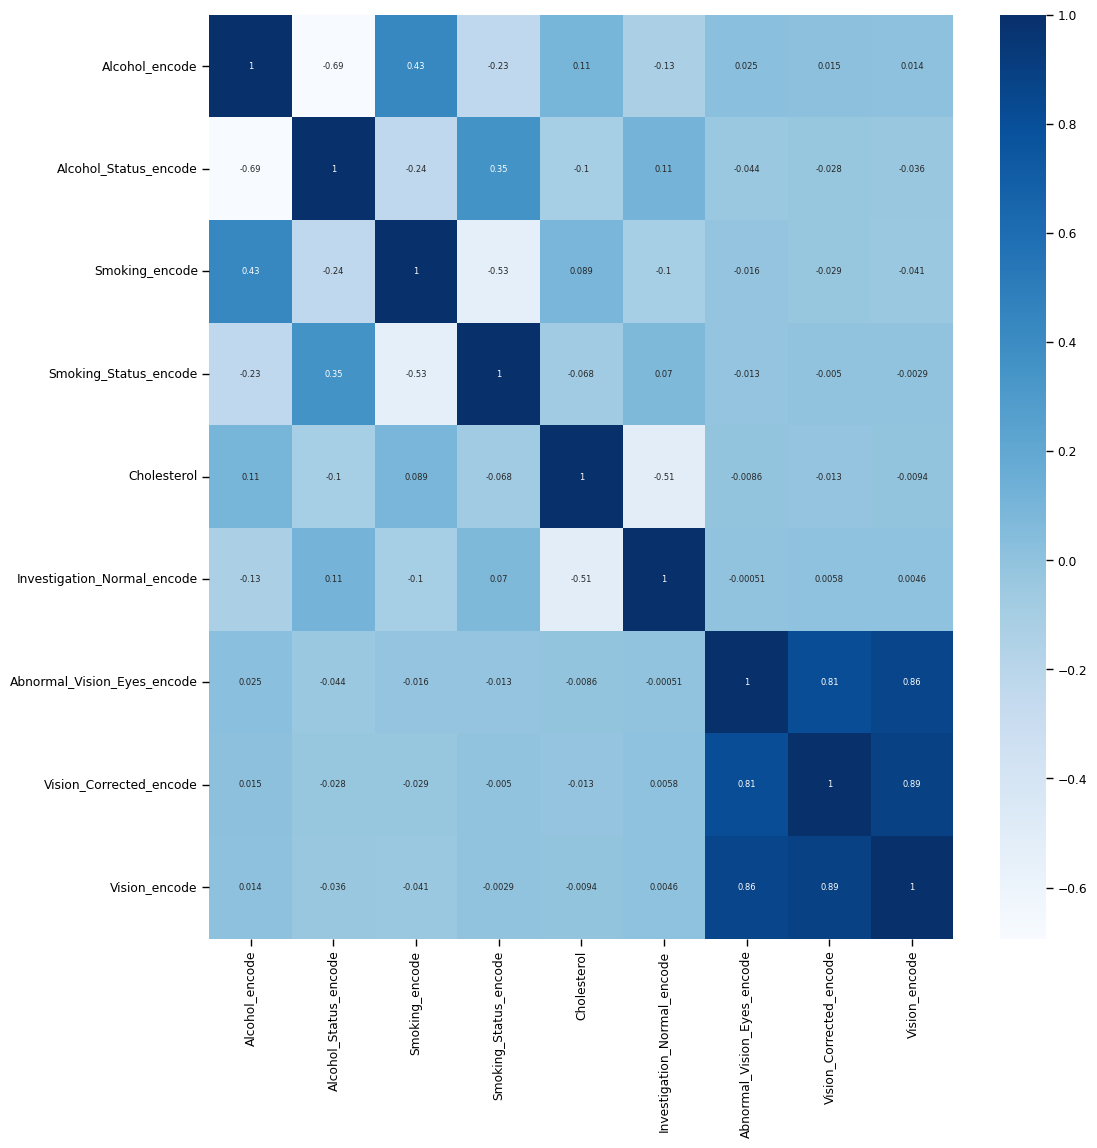

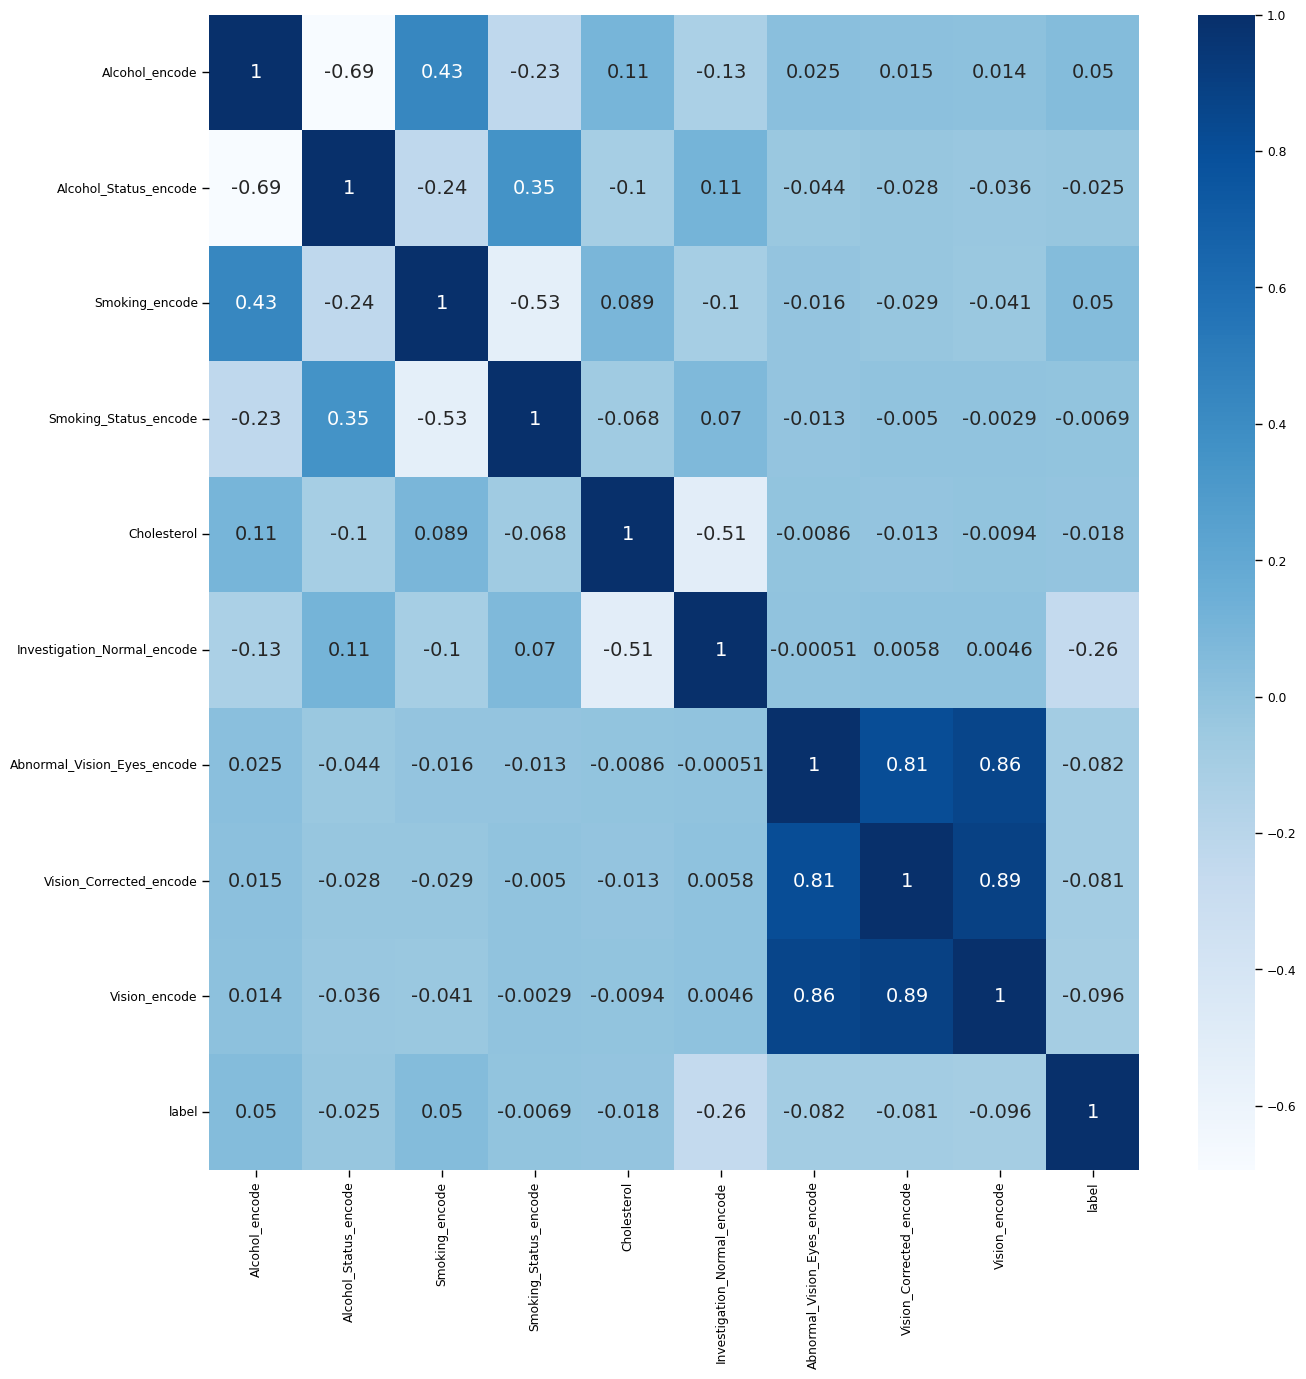

In [55]:
high_corr_col = list()
for i in range(0,len(sort_corr.index)-1):
 if i %2 == 0:
  high_corr_col.append(sort_corr.index[i][0])
  high_corr_col.append(sort_corr.index[i][1])
# remove duplicate elements from the list
high_corr_col = list(dict.fromkeys(high_corr_col))
# get correlation pairs
high_corr = df[high_corr_col].corr()
fig, ax = plt.subplots(figsize=(12,12))
sb.set_context("paper", rc={"font.size":6,"axes.titlesize":10,"axes.labelsize":10})
sb.heatmap(high_corr, cmap="Blues", annot=True)
col = ['Abnormal_Vision_Eyes', 'Vision_Corrected', 'Vision']
for i in col:
 print(df['Vision_Corrected'].unique())
['Corrected' 'Normal' 'Not Corrected']
['Corrected' 'Normal' 'Not Corrected']
['Corrected' 'Normal' 'Not Corrected']
for i in col:
 print(i)
 print(df[i].unique())
high_corr_col.append('label')
# get correlation pairs
high_corr = df[high_corr_col].corr()
fig, ax = plt.subplots(figsize=(15,15))
sb.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})
sb.heatmap(high_corr, cmap="Blues", annot=True)
label_corr = high_corr['label']
label_corr
# columns to remove due to high correlation to other columns
to_delete = ['Alcohol_Status_encode', 'Hearing_encode', 'Smoking_Status_encode', 'Investigation_Normal_encode', 'Vision_Corrected_encode', 'Vision_encode']
df = df.drop(to_delete, axis = 1)

<ipython-input-56-2e8ddac7b398>:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sb.kdeplot(df_num[i] , bw = 0.5)


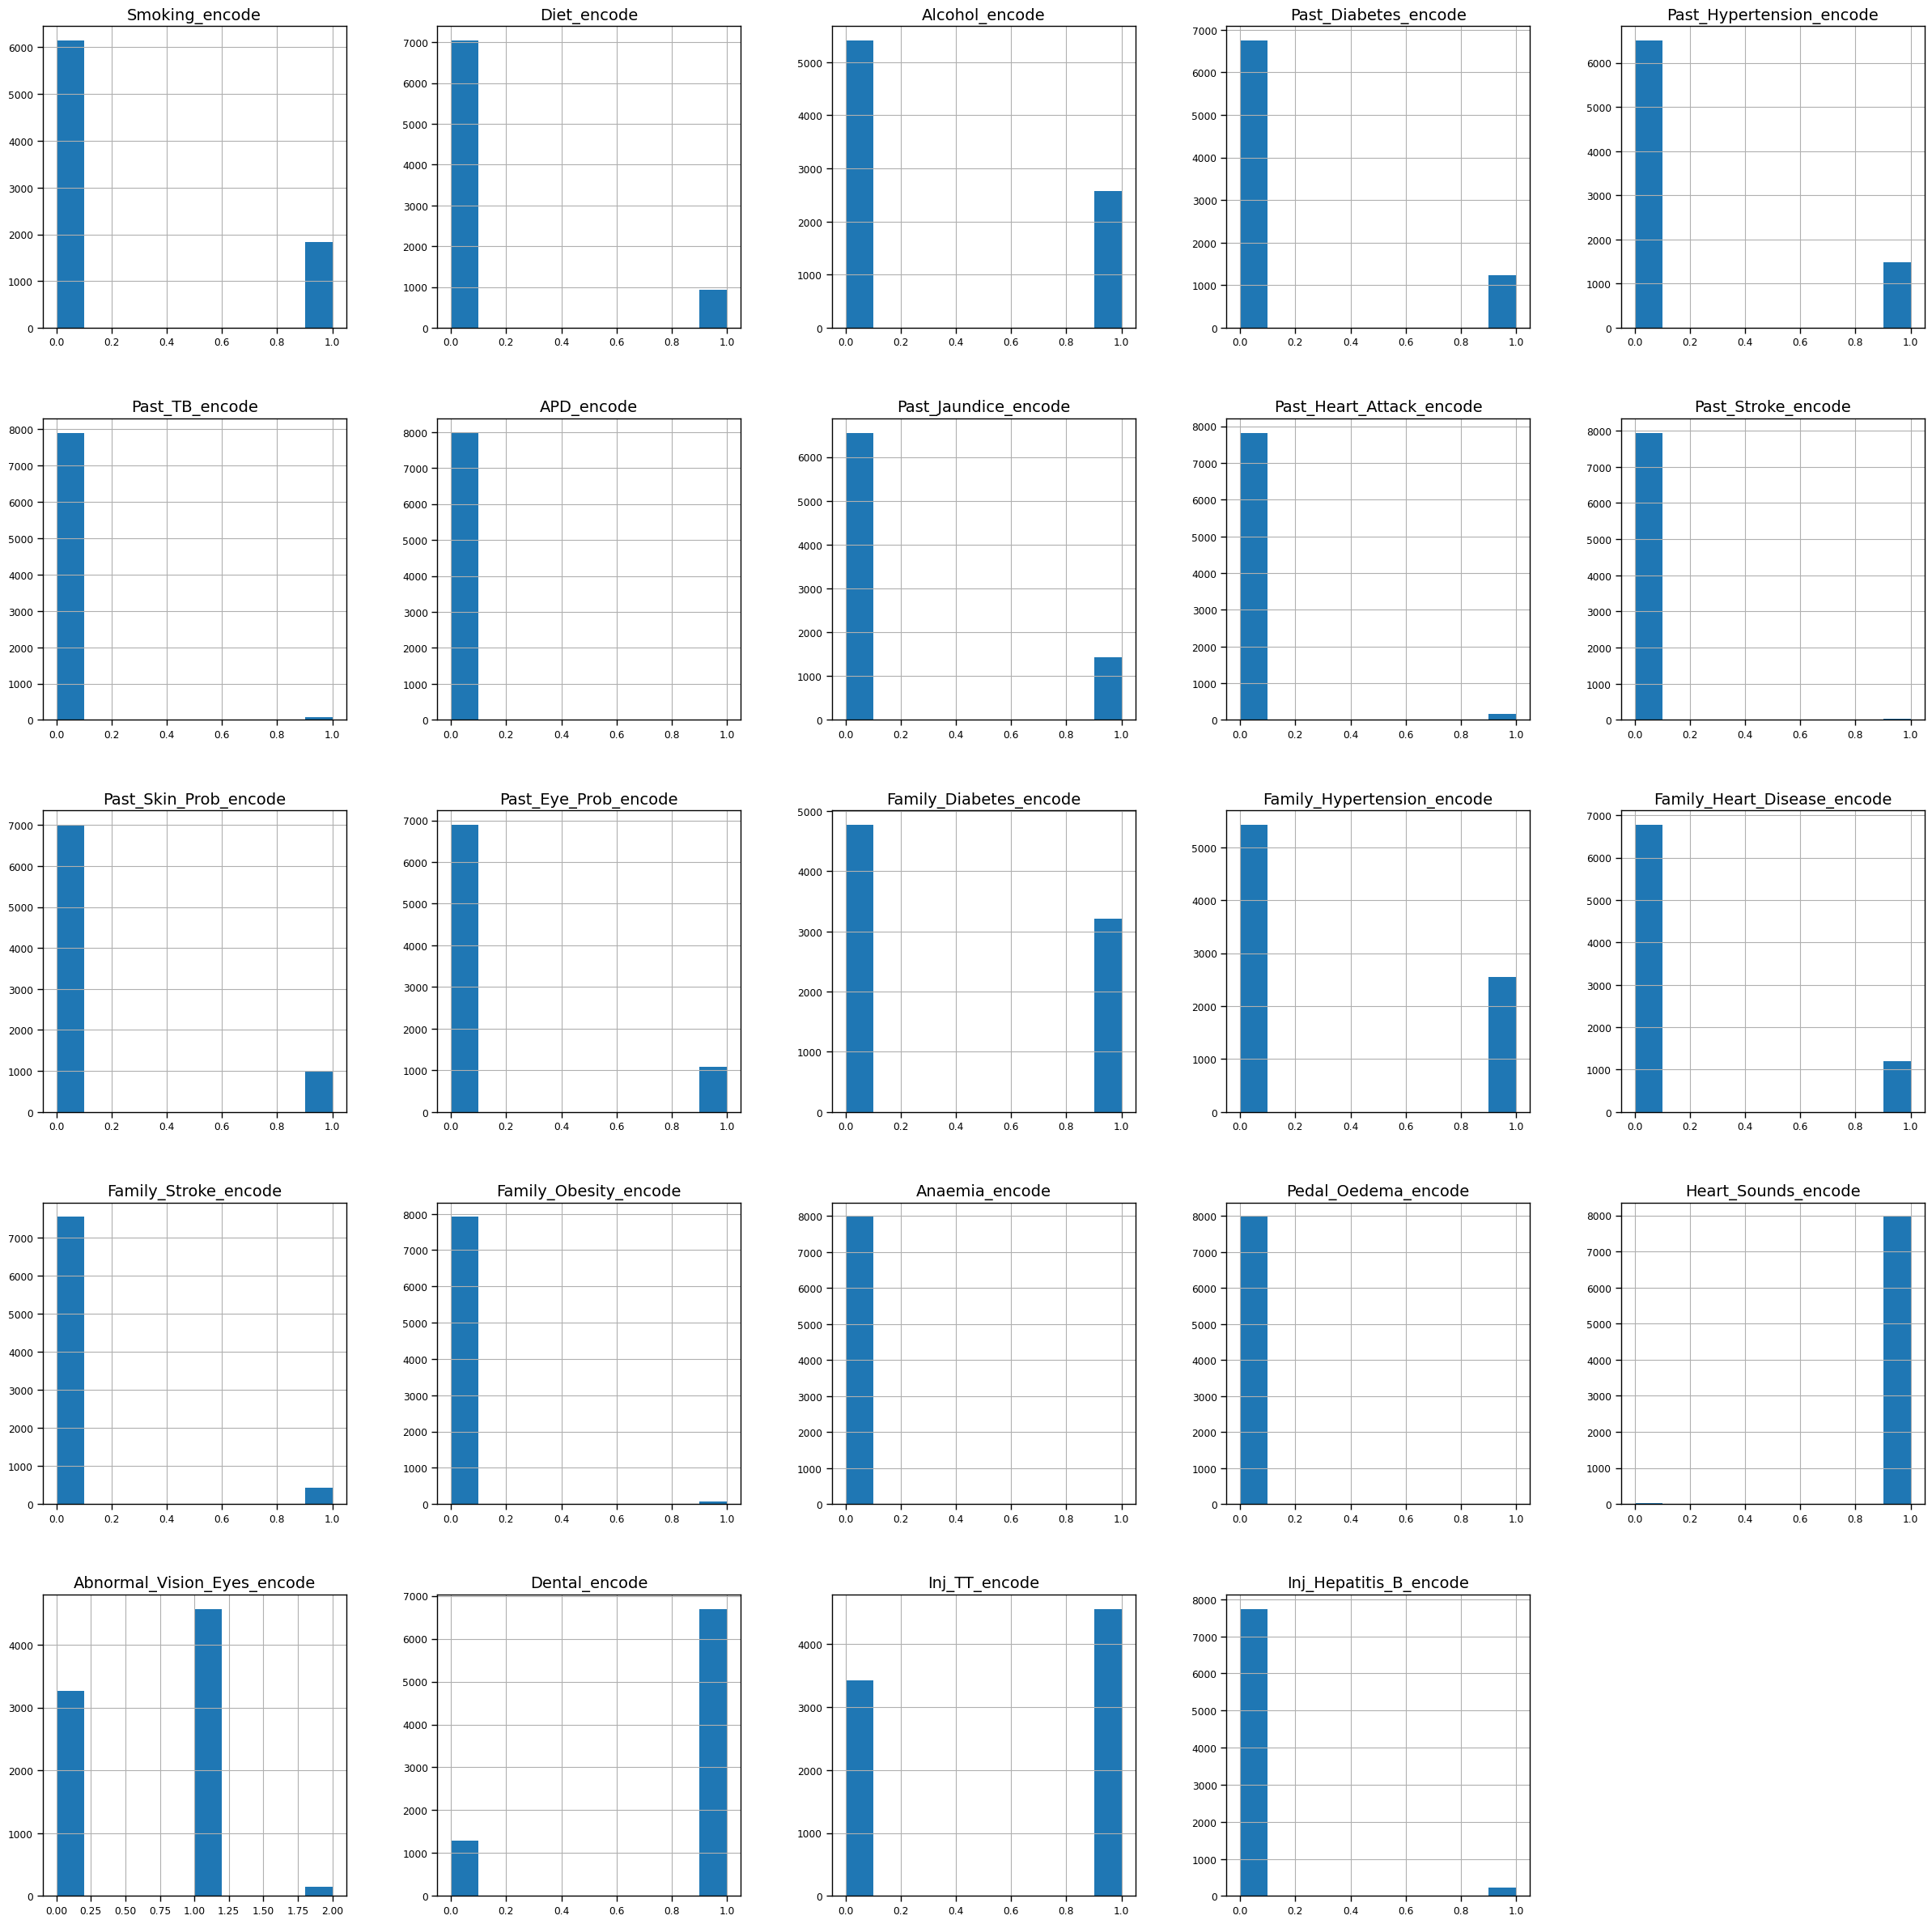

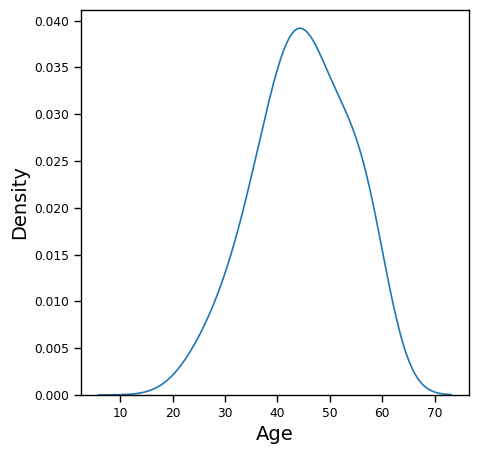

<ipython-input-56-2e8ddac7b398>:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sb.kdeplot(df_num[i] , bw = 0.5)


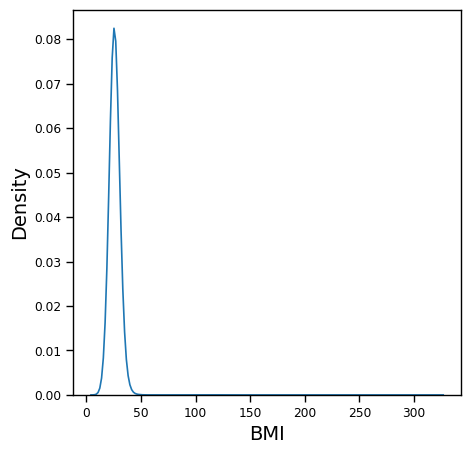

<ipython-input-56-2e8ddac7b398>:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sb.kdeplot(df_num[i] , bw = 0.5)


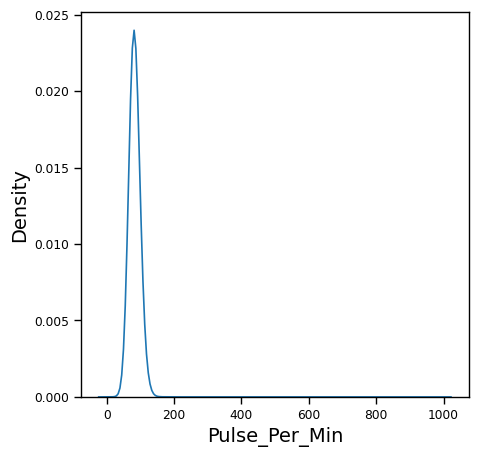

<ipython-input-56-2e8ddac7b398>:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sb.kdeplot(df_num[i] , bw = 0.5)


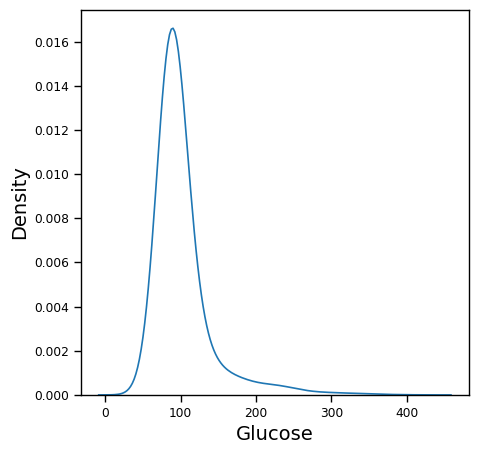

<ipython-input-56-2e8ddac7b398>:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sb.kdeplot(df_num[i] , bw = 0.5)


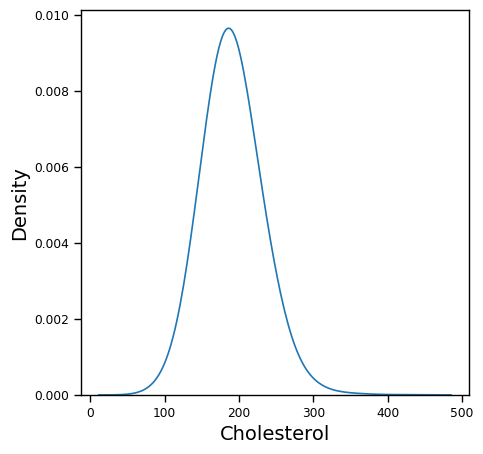

<ipython-input-56-2e8ddac7b398>:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sb.kdeplot(df_num[i] , bw = 0.5)


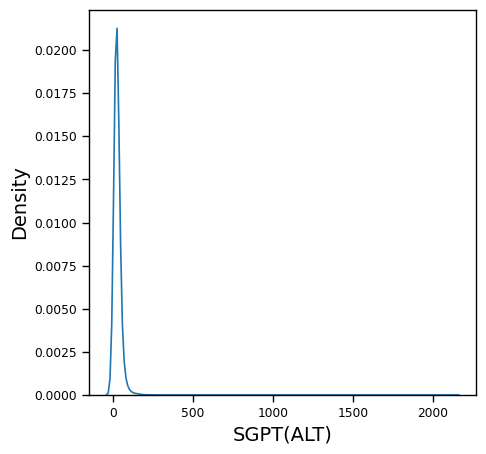

<ipython-input-56-2e8ddac7b398>:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sb.kdeplot(df_num[i] , bw = 0.5)


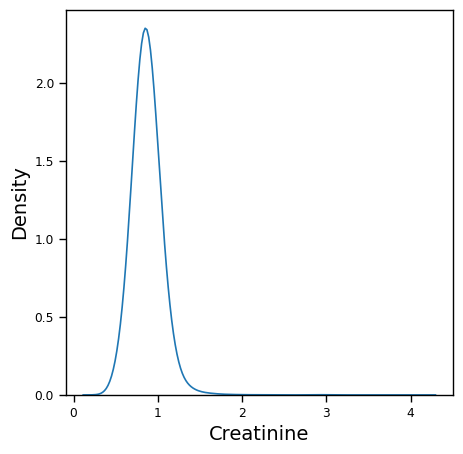

<ipython-input-56-2e8ddac7b398>:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sb.kdeplot(df_num[i] , bw = 0.5)


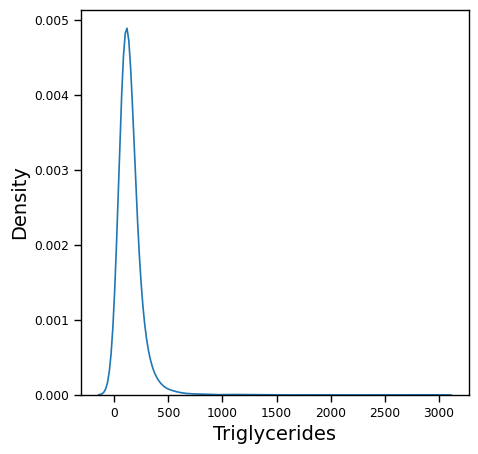

<ipython-input-56-2e8ddac7b398>:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sb.kdeplot(df_num[i] , bw = 0.5)


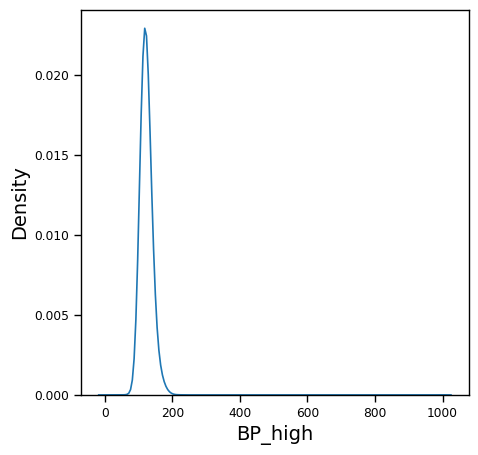

<ipython-input-56-2e8ddac7b398>:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sb.kdeplot(df_num[i] , bw = 0.5)


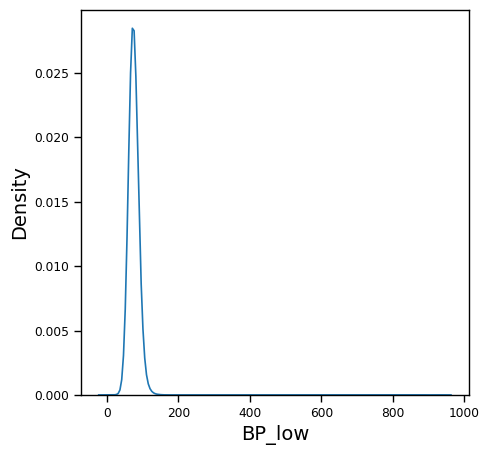

In [56]:
# reset index
df = df.reset_index()
del df['index']
encode_col = list(df.filter(like='_encode').columns)
float_col = list(df.select_dtypes(include=['float64']).columns)
model_col = encode_col + float_col
df_num = df[model_col]
df_num.shape
df_num[encode_col].hist(figsize = (30,30))
import matplotlib.pyplot as plt
for i in float_col:
 plt.figure(figsize = (5,5))
 sb.kdeplot(df_num[i] , bw = 0.5)
 plt.show()


In [57]:
from sklearn import preprocessing
# normalising
d = preprocessing.normalize(df[float_col])
scaled_df = pd.DataFrame(d, columns = df[float_col].columns)
scaled_df.head()
# merge
model_df = scaled_df.join(df[encode_col])
model_df.shape

(7981, 34)

In [58]:
# check correlation between past_diabetes and the label
corr_col = ['Past_Diabetes_encode', 'label']
df[corr_col].corr()
# drop the 'past_diabetes' column
model_df = model_df.drop('Past_Diabetes_encode', axis=1)

In [59]:
y = df['label'].reset_index()
del y['index']
import dask.dataframe as dd
# export as X and y as parquet files
model_df.to_parquet('X.parquet')
y.to_parquet('y.parquet')

In [60]:
import pandas as pd
!pip install fastparquet
X = pd.read_parquet('X.parquet', engine='fastparquet')
y = pd.read_parquet('y.parquet', engine='fastparquet')
X.columns
from sklearn.model_selection import (train_test_split,KFold,StratifiedKFold,StratifiedGroupKFold,RepeatedStratifiedKFold,cross_val_score)
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, roc_auc_score

import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
encode_col = X.filter(like='_encode').columns
cat_ind = list()
for i in encode_col:
 cat_ind.append(X.columns.get_loc(i))
# encoded column data type from integer to category
X_new = X
for i in encode_col:
 X_new[i] = X_new[i].astype('category')
y.dtypes


label    int64
dtype: object

In [61]:
skf = StratifiedKFold(n_splits=5, shuffle = True)
sclf = RandomForestClassifier(random_state = 1)
params = {'max_depth': [5,7,9,11,13,15,17,19]}
grid_rf = GridSearchCV(estimator=sclf, param_grid=params, cv = skf, refit = True, return_train_score = True)
grid_rf.fit(X_new, y.values.ravel())
print("Best: %f using %s" % (grid_rf.best_score_, grid_rf.best_params_))

Best: 0.912668 using {'max_depth': 17}


In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_aucs = []
rf_acc = []
rf_f1 = []
rf_train = []
rf_specificity = []
rf_sensitivity = []
iteration = 4
def rfModel(X_new, y, iteration):
 for i in range(iteration):
  print(f"**************** iteration {i+1} *******************")

 # 5 fold stratified k fold cross validation
 skf = StratifiedKFold(n_splits=5, shuffle = True)

 fold = 1

 for train_idx, val_idx in skf.split(X, y):
  X_tr = X_new.loc[train_idx]
  y_tr = y.loc[train_idx]
  X_val = X_new.loc[val_idx]
  y_val = y.loc[val_idx]


 # Fit Model on Train
 rf = RandomForestClassifier(random_state = 1, max_depth = 12)
 rf.fit(X_tr, y_tr.values.ravel())


 pred = rf.predict(X_val)
 pred_prob = rf.predict_proba(X_val)[:, 1]
 acc_score = accuracy_score(y_val, pred)
 auc_score = roc_auc_score(y_val, pred_prob)
 train_acc_score = rf.score(X_tr, y_tr)

 tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()
 specificity = tn / (tn+fp)
 sensitivity = tp / (tp + fn)
 print(f"======= Fold {fold} ========")
 print(f"Our accuracy on the validation set is {acc_score:0.4f}, AUC is {auc_score:0.4f}, F1 is {f1_score(y_val, pred): 0.4f}")

 print(f"Our accuracy on the training set is {train_acc_score:0.4f}")
 fold += 1
 rf_aucs.append(auc_score)
 rf_acc.append(acc_score)
 rf_f1.append(f1_score(y_val, pred))
 rf_train.append(train_acc_score)
 rf_specificity.append(specificity)
 rf_sensitivity.append(sensitivity)
import time
start = time.process_time()
rfModel(X_new, y, iteration)
time_rf = time.process_time() - start
rf_mean_auc = np.mean(rf_aucs)
rf_mean_acc = np.mean(rf_acc)
rf_mean_f1 = np.mean(rf_f1)
rf_mean_train = np.mean(rf_train)
rf_mean_specificity = np.mean(rf_specificity)
rf_mean_sensitivity = np.mean(rf_sensitivity)
print(f'out of fold Accuracy score is {np.mean(rf_acc):0.4f}')
print(f'out of fold Training Accuracy score is {np.mean(rf_train):0.4f}')
print(f'out of fold AUC score is {np.mean(rf_aucs):0.4f}')
print(f'out of fold f1 score is {np.mean(rf_f1):0.4f}')
print(f'out of fold Specificity score is {np.mean(rf_specificity):0.4f}')
print(f'out of fold Sensitivity score is {np.mean(rf_sensitivity):0.4f}')

**************** iteration 1 *******************
**************** iteration 2 *******************
**************** iteration 3 *******************
**************** iteration 4 *******************
======= Fold 1 ========
Our accuracy on the validation set is 0.9179, AUC is 0.9252, F1 is  0.7254
Our accuracy on the training set is 0.9626
out of fold Accuracy score is 0.9179
out of fold Training Accuracy score is 0.9626
out of fold AUC score is 0.9252
out of fold f1 score is 0.7254
out of fold Specificity score is 0.9931
out of fold Sensitivity score is 0.5864
